In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Caminho via Colab + Drive
# death_df = pd.read_csv("/content/drive/MyDrive/ADA_Braskem/Curso/4-[DS-PY-004] TÉCNICAS DE PROGRAMAÇÃO I (PY)/datasets/COVID DEATHS.csv")
# vaccinations_df = pd.read_csv("/content/drive/MyDrive/ADA_Braskem/Curso/4-[DS-PY-004] TÉCNICAS DE PROGRAMAÇÃO I (PY)/datasets/COVID_VACCINATIONS.csv")

# No VSCode o caminho fica diferente:
death_df = pd.read_csv("datasets/COVID DEATHS.csv")
vaccinations_df = pd.read_csv("datasets/COVID_VACCINATIONS.csv")

# Usando NUMPY

## 01 - Os 10 paises com maior população tiveram maiores números, em proporção, de mortes por Covid-19?

**Justificativa**: Devido ao número elevado de pessoas no país, e consequentemente, seu recursos de saúde limitados, o número de mortes pela Covid pode ter sido muito maior, do que em paises com menor população.

In [7]:
covid = np.genfromtxt(
    "datasets/COVID DEATHS.csv",
    delimiter=',',
    skip_header=1,
    dtype=[
        ('location', 'U100'),
        ('population', int),
        ('new_deaths', float)
    ],
    usecols=(2, 4, 9)
)

covid

array([('Afghanistan', 41128772, 0.), ('Afghanistan', 41128772, 0.),
       ('Afghanistan', 41128772, 0.), ..., ('Zimbabwe', 16320539, 0.),
       ('Zimbabwe', 16320539, 0.), ('Zimbabwe', 16320539, 0.)],
      dtype=[('location', '<U100'), ('population', '<i8'), ('new_deaths', '<f8')])

In [8]:
unique = np.unique(covid['location'], return_index=True)[1]
unique.shape

(255,)

In [9]:
paises = covid['location'][unique]
paises.shape

(255,)

In [10]:
pop = covid['population'][unique]
pop
# pop.shape
# type(pop)

array([  41128772, 1426736614,    2842318,   44903228,      44295,
            79843,   35588996,      15877,      93772,   45510324,
          2780472,     106459, 4721383370,   26177410,    8939617,
         10358078,     409989,    1472237,  171186368,     281646,
          9534956,   11655923,     405285,   13352864,      64207,
           782457,   12224114,      27052,    3233530,    2630300,
        215313504,      31332,     449002,    6781955,   22673764,
         12889583,   16767851,   27914542,   38454328,     593162,
            68722,    5579148,   17723312,   19603736, 1425887360,
         51874028,     836783,    5970430,      17032,    5180836,
         28160548,    4030361,   11212198,     191173,     896007,
         10493990,   99010216,    5882259,    1120851,      72758,
         11228821,   18001002,  110990096,    6336393,   56550000,
          1674916,    3684041,    1326064,    1201680,  123379928,
        744807803,  450146793,      53117,       3801,     929

In [11]:
pais = np.unique(covid['location'])

In [12]:
copy_covid = covid[~np.isnan(covid['new_deaths'])].copy()

In [13]:
cases = [(p, copy_covid[copy_covid['location'] == p]['new_deaths'].sum()) for p in pais]
# len(cases)
# type(cases)
casos = np.array(cases)
# casos.shape
casos[:5]

array([['Afghanistan', '7884.0'],
       ['Africa', '258851.0'],
       ['Albania', '3604.0'],
       ['Algeria', '6881.0'],
       ['American Samoa', '34.0']], dtype='<U32')

In [14]:
total_array = np.hstack((pop[:, np.newaxis], casos))
total_array[:5]

array([['41128772', 'Afghanistan', '7884.0'],
       ['1426736614', 'Africa', '258851.0'],
       ['2842318', 'Albania', '3604.0'],
       ['44903228', 'Algeria', '6881.0'],
       ['44295', 'American Samoa', '34.0']], dtype='<U32')

In [15]:
# Calculo da proporção entre mortes e população
calc_percent = (total_array[:, 2].astype(float) / total_array[:, 0].astype(float))*100
calc_percent[:5]

array([0.01916906, 0.01814287, 0.12679792, 0.01532407, 0.0767581 ])

In [16]:
result = np.hstack((total_array, calc_percent[:, np.newaxis]))
result[:5]
# 0-Population
# 1-Country
# 2-Total Deaths
# 3-Proportion

array([['41128772', 'Afghanistan', '7884.0', '0.01916906247529102'],
       ['1426736614', 'Africa', '258851.0', '0.0181428721643503'],
       ['2842318', 'Albania', '3604.0', '0.12679791634855775'],
       ['44903228', 'Algeria', '6881.0', '0.015324065343364624'],
       ['44295', 'American Samoa', '34.0', '0.07675809910825149']],
      dtype='<U32')

In [17]:
# Análise Top10 países por maior população

sorted_indices = np.argsort(result[:, 0].astype(int))[::-1]
sorted_array = result[sorted_indices]
print(sorted_array[:20])
# Países com maior população, indices (5,6,13,14,15,16,17,18,19,20)

[['7975105024' 'World' '6899687.0' '0.08651531207722438']
 ['4721383370' 'Asia' '1628635.0' '0.034494868820618564']
 ['3432097300' 'Lower middle income' '1340097.0' '0.039046008398421574']
 ['2525921300' 'Upper middle income' '2654426.0' '0.10508743878916577']
 ['1426736614' 'Africa' '258851.0' '0.0181428721643503']
 ['1425887360' 'China' '120905.0' '0.008479281280675634']
 ['1417173120' 'India' '531000.0' '0.03746895792096311']
 ['1250514600' 'High income' '2853330.0' '0.22817246595921392']
 ['744807803' 'Europe' '2038597.0' '0.27370779304254955']
 ['737604900' 'Low income' '47890.0' '0.006492635827120996']
 ['600323657' 'North America' '1594720.0' '0.26564337110573005']
 ['450146793' 'European Union' '1223798.0' '0.27186642647035364']
 ['436816679' 'South America' '1352944.0' '0.30972809991992084']
 ['338289856' 'United States' '1121237.0' '0.3314426903773313']
 ['275501344' 'Indonesia' '161071.0' '0.05846468756246794']
 ['235824864' 'Pakistan' '30652.0' '0.01299778126873']
 ['218541

In [18]:
top10_i = [5,6,13,14,15,16,17,18,19,20]
top10_pop = sorted_array[top10_i]
top10_pop

array([['1425887360', 'China', '120905.0', '0.008479281280675634'],
       ['1417173120', 'India', '531000.0', '0.03746895792096311'],
       ['338289856', 'United States', '1121237.0', '0.3314426903773313'],
       ['275501344', 'Indonesia', '161071.0', '0.05846468756246794'],
       ['235824864', 'Pakistan', '30652.0', '0.01299778126873'],
       ['218541216', 'Nigeria', '3155.0', '0.0014436636062279437'],
       ['215313504', 'Brazil', '700556.0', '0.3253655655522656'],
       ['171186368', 'Bangladesh', '29452.0', '0.017204640967673313'],
       ['144713312', 'Russia', '397642.0', '0.27477914402235504'],
       ['127504120', 'Mexico', '333596.0', '0.2616354671519634']],
      dtype='<U32')

In [19]:
# Análise Top10 países por maior número de morte proporcionais %

sorted_indices = np.argsort(result[:, 3].astype(float))[::-1]
sorted_array = result[sorted_indices]

In [20]:
print(sorted_array[:10])

[['34049588' 'Peru' '219866.0' '0.645722937969176']
 ['6781955' 'Bulgaria' '38282.0' '0.5644685050254683']
 ['3233530' 'Bosnia and Herzegovina' '16328.0' '0.5049589767220345']
 ['9967304' 'Hungary' '48719.0' '0.4887881417081289']
 ['2093606' 'North Macedonia' '9667.0' '0.461739219318248']
 ['3744385' 'Georgia' '17032.0' '0.4548677553189643']
 ['4030361' 'Croatia' '18091.0' '0.4488679798162001']
 ['627082' 'Montenegro' '2808.0' '0.4477883275233542']
 ['2119843' 'Slovenia' '9230.0' '0.43540960344704777']
 ['10493990' 'Czechia' '42702.0' '0.40691862675683893']]


### Conclusão
Os TOP10 com maior população não necessariamente possuíram os maiores números de mortes proporcionais.

TOP10 - População e % de mortes

* China - 0,008%
* India - 0,037%
* United States - 0,331%
* Indonesia - 0,058%
* Pakistan - 0,012%
* Nigeria - 0,001%
* Brazil - 0,325%
* Bangladesh - 0,017%
* Russia - 0,274%
* Mexico - 0,261%

TOP10 - Maiores % de mortes

* Peru - 0,645%
* Bulgaria - 0,564%
* Bosnia and Herzegovina - 0,504%
* Hungary - 0,488%
* North Macedonia - 0,461%
* Georgia - 0,454%
* Croatia - 0,448%
* Montenegro - 0,447%
* Slovenia - 0,435%
* Czechia - 0,406%

## 10 - Quais foram os 5 países com maior % de mortes em relação a sua população total?

**Justificativa:** Verficar se houve alguma relação entre localização (continente) e contaminção.

In [22]:
covid = np.genfromtxt(
    "datasets/COVID DEATHS.csv",
    delimiter=',',
    skip_header=1,
    dtype=[
        ('location', 'U100'),
        ('continent', 'U100'),
        ('population', int),
        ('new_deaths', float)
    ],
    usecols=(2, 1, 4, 9)
)

covid

array([('Afghanistan', 'Asia', 41128772, 0.),
       ('Afghanistan', 'Asia', 41128772, 0.),
       ('Afghanistan', 'Asia', 41128772, 0.), ...,
       ('Zimbabwe', 'Africa', 16320539, 0.),
       ('Zimbabwe', 'Africa', 16320539, 0.),
       ('Zimbabwe', 'Africa', 16320539, 0.)],
      dtype=[('location', '<U100'), ('continent', '<U100'), ('population', '<i8'), ('new_deaths', '<f8')])

In [23]:
unique = np.unique(covid[['location', 'continent']], return_index=True, axis=0)[1]
unique

array([     0,   1196,   2392,   3588,   4784,   5980,   7176,   8372,
         9568,  10764,  11966,  13162,  14363,  15564,  16761,  17963,
        19159,  20355,  21551,  22752,  23948,  25144,  26340,  27536,
        28732,  29928,  31124,  32320,  33516,  34712,  35908,  37104,
        38300,  39496,  40697,  41893,  43089,  44285,  45481,  46677,
        47873,  49069,  50265,  51461,  52663,  53859,  55055,  56251,
        57447,  58643,  59839,  61035,  62231,  63430,  64626,  65822,
        67023,  68219,  69415,  70611,  71807,  73003,  74199,  75395,
        76591,  77710,  78906,  80102,  81298,  82494,  83690,  84891,
        86092,  87288,  88484,  89685,  90881,  92081,  93277,  94473,
        95669,  96865,  98061,  99263, 100459, 101655, 102856, 104052,
       105248, 106444, 107640, 108836, 110032, 111228, 112424, 113620,
       114816, 116017, 117213, 118385, 119581, 120777, 121978, 123174,
       124370, 125566, 126762, 127958, 129160, 130361, 131557, 132757,
      

In [24]:
paises = covid[unique]
paises[:5]

array([('Afghanistan', 'Asia',   41128772, 0.),
       ('Africa', '', 1426736614, 0.),
       ('Albania', 'Europe',    2842318, 0.),
       ('Algeria', 'Africa',   44903228, 0.),
       ('American Samoa', 'Oceania',      44295, 0.)],
      dtype=[('location', '<U100'), ('continent', '<U100'), ('population', '<i8'), ('new_deaths', '<f8')])

In [25]:
pop = covid['population'][unique]
pop[:5]

array([  41128772, 1426736614,    2842318,   44903228,      44295])

In [26]:
pais = np.unique(covid['location'])
pais.shape

(255,)

In [27]:
continente = covid['continent'][unique]
continente.shape

(255,)

In [28]:
copy_covid = covid[~np.isnan(covid['new_deaths'])].copy()

In [29]:
cases = [(p, copy_covid[copy_covid['location'] == p]['new_deaths'].sum()) for p in pais]
casos = np.array(cases)
casos[:5]

array([['Afghanistan', '7884.0'],
       ['Africa', '258851.0'],
       ['Albania', '3604.0'],
       ['Algeria', '6881.0'],
       ['American Samoa', '34.0']], dtype='<U32')

In [30]:
total_array = np.hstack((pop[:, np.newaxis], casos))
total_array = np.hstack((continente[:, np.newaxis], total_array))
total_array[:5]

array([['Asia', '41128772', 'Afghanistan', '7884.0'],
       ['', '1426736614', 'Africa', '258851.0'],
       ['Europe', '2842318', 'Albania', '3604.0'],
       ['Africa', '44903228', 'Algeria', '6881.0'],
       ['Oceania', '44295', 'American Samoa', '34.0']], dtype='<U100')

In [31]:
# Calculo da proporção entre mortes e população
calc_percent = (total_array[:, 3].astype(float) / total_array[:, 1].astype(float))*100
calc_percent[:5]

array([0.01916906, 0.01814287, 0.12679792, 0.01532407, 0.0767581 ])

In [32]:
result = np.hstack((total_array, calc_percent[:, np.newaxis]))
result[:5]
# 0-Continente
# 1-Population
# 2-Country
# 3-Total Deaths
# 4-Proportion

array([['Asia', '41128772', 'Afghanistan', '7884.0',
        '0.01916906247529102'],
       ['', '1426736614', 'Africa', '258851.0', '0.0181428721643503'],
       ['Europe', '2842318', 'Albania', '3604.0', '0.12679791634855775'],
       ['Africa', '44903228', 'Algeria', '6881.0',
        '0.015324065343364624'],
       ['Oceania', '44295', 'American Samoa', '34.0',
        '0.07675809910825149']], dtype='<U100')

In [33]:
# Análise Top5 países por maior número de morte percentuais %

sorted_indices = np.argsort(result[:, 4].astype(float))[::-1]
sorted_array = result[sorted_indices]
print(sorted_array[:5])

[['South America' '34049588' 'Peru' '219866.0' '0.645722937969176']
 ['Europe' '6781955' 'Bulgaria' '38282.0' '0.5644685050254683']
 ['Europe' '3233530' 'Bosnia and Herzegovina' '16328.0'
  '0.5049589767220345']
 ['Europe' '9967304' 'Hungary' '48719.0' '0.4887881417081289']
 ['Europe' '2093606' 'North Macedonia' '9667.0' '0.461739219318248']]


### Conclusão
Os TOP5 países com maior % de mortes são na maioria países da Europa, pode ser que haja correlação!

TOP5 - Países com maior % de mortes e seus continentes

* Peru - South America - 0.64%
* Bulgaria - Europe - 0.56%
* Bosnia and Herzegovina - Europe - 0.50%
* Hungary - Europe - 0.48%
* North Macedonia - Europe - 0.46

# Usando PANDAS

## 02 - Países com maior índice de rigidez nas restrições tem uma taxa de mortalidade menor?

**Justificativa:** Verficar se as medidas restritivas auxiliou na diminuição da taxa de mortalidade

Obs.: Taxa de mortalidade = Total de Mortes / habitantes

In [34]:
covid_df = pd.read_csv("datasets/COVID DEATHS.csv")
covid_df.head(100)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AFG,Asia,Afghanistan,4/7/2020,41128772,367.0,30.0,28.714,11.0,4.0,...,0.024,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,AFG,Asia,Afghanistan,4/8/2020,41128772,423.0,56.0,33.000,14.0,3.0,...,0.035,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,AFG,Asia,Afghanistan,4/9/2020,41128772,444.0,21.0,29.857,15.0,1.0,...,0.038,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,AFG,Asia,Afghanistan,4/10/2020,41128772,521.0,77.0,36.000,15.0,0.0,...,0.035,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ex = covid_df.iloc[:, [2,4,9]]
ex

,location,population,new_deaths
0,Afghanistan,41128772,0.0
1,Afghanistan,41128772,0.0
2,Afghanistan,41128772,0.0
3,Afghanistan,41128772,0.0
4,Afghanistan,41128772,0.0
...,...,...,...
302744,Zimbabwe,16320539,1.0
302745,Zimbabwe,16320539,0.0
302746,Zimbabwe,16320539,0.0
302747,Zimbabwe,16320539,0.0


In [36]:
loc_pop = covid_df[['location', 'population']].drop_duplicates()
loc_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 0 to 301553
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    255 non-null    object
 1   population  255 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


In [37]:
nd_sum = covid_df.groupby('location')['new_deaths'].sum()
nd_sum.info()

<class 'pandas.core.series.Series'>
Index: 255 entries, Afghanistan to Zimbabwe
Series name: new_deaths
Non-Null Count  Dtype  
--------------  -----  
255 non-null    float64
dtypes: float64(1)
memory usage: 4.0+ KB


In [38]:
result = loc_pop.merge(nd_sum, on='location')
result

,location,population,new_deaths
0,Afghanistan,41128772,7884.0
1,Africa,1426736614,258851.0
2,Albania,2842318,3604.0
3,Algeria,44903228,6881.0
4,American Samoa,44295,34.0
...,...,...,...
250,Western Sahara,576005,0.0
251,World,7975105024,6899687.0
252,Yemen,33696612,2159.0
253,Zambia,20017670,4057.0


In [39]:
result['tx'] = (result['new_deaths'] / result['population'])*100
result

,location,population,new_deaths,tx
0,Afghanistan,41128772,7884.0,0.019169
1,Africa,1426736614,258851.0,0.018143
2,Albania,2842318,3604.0,0.126798
3,Algeria,44903228,6881.0,0.015324
4,American Samoa,44295,34.0,0.076758
...,...,...,...,...
250,Western Sahara,576005,0.0,0.000000
251,World,7975105024,6899687.0,0.086515
252,Yemen,33696612,2159.0,0.006407
253,Zambia,20017670,4057.0,0.020267


In [40]:
result.sort_values(by='tx', ascending=True).head(10)

,location,population,new_deaths,tx
161,Niue,1952,0.0,0.0
163,North Korea,26069416,0.0,0.0
130,Macao,695180,0.0,0.0
98,Hong Kong,7488863,0.0,0.0
199,Scotland,5466000,0.0,0.0
227,Tokelau,1893,0.0,0.0
189,Saint Helena,5401,0.0,0.0
232,Turkmenistan,6430777,0.0,0.0
234,Tuvalu,11335,0.0,0.0
64,England,56550000,0.0,0.0


### Conclusão
Nesse caso teria que fazer uma análise conjunta com as medidas restritivas adotadas em cada um dos países com menores taxas de mortalidade.

## 03 - Países que testaram mais pessoas tiveram menos casos positivos de Covid-19?

**Justificativa:** Verificar se países que testaram mais conseguiram isolar essas pessoas e consequentemente ter menos casos positivos no geral

In [41]:
death_df = pd.read_csv("datasets/COVID DEATHS.csv")
vaccinations_df = pd.read_csv("datasets/COVID_VACCINATIONS.csv")

In [42]:
nc_sum = death_df.groupby('location')['new_cases'].sum().reset_index()
nc_sum

,location,new_cases
0,Afghanistan,211631.0
1,Africa,13075600.0
2,Albania,333897.0
3,Algeria,271613.0
4,American Samoa,8326.0
...,...,...
250,Western Sahara,0.0
251,World,763128258.0
252,Yemen,11945.0
253,Zambia,343415.0


In [43]:
nc_sum_sort = nc_sum.sort_values(by='new_cases', ascending=False)
nc_sum_sort.head(20)
# Index dos top5 países: 239,44,101,76,82

,location,new_cases
251,World,763128258.0
96,High income,419283550.0
12,Asia,295847337.0
70,Europe,248182478.0
241,Upper middle income,243254393.0
71,European Union,183460552.0
162,North America,123493697.0
239,United States,102873924.0
44,China,99239252.0
128,Lower middle income,97088159.0


In [44]:
nc_sum_id = [239,44,101,76,82]
nc_sum.iloc[nc_sum_id]

,location,new_cases
239,United States,102873924.0
44,China,99239252.0
101,India,44768926.0
76,France,38791479.0
82,Germany,38368891.0


In [45]:
nt_sum = vaccinations_df.groupby('location')['new_tests'].sum().reset_index()
nt_sum

,location,new_tests
0,Afghanistan,0.0
1,Africa,0.0
2,Albania,1613870.0
3,Algeria,0.0
4,American Samoa,0.0
...,...,...
250,Western Sahara,0.0
251,World,0.0
252,Yemen,0.0
253,Zambia,3412336.0


In [46]:
nt_sum_sort = nt_sum.sort_values(by='new_tests', ascending=False)
nt_sum_sort.head(20)
# Index dos top5 países: 239,101,238,76,108

,location,new_tests
239,United States,912769124.0
101,India,838798638.0
238,United Kingdom,502482746.0
76,France,278234000.0
108,Italy,224719845.0
14,Austria,188768459.0
237,United Arab Emirates,168522672.0
231,Turkey,163164533.0
186,Russia,156015815.0
212,South Korea,100269452.0


In [47]:
nt_sum_id = [239,101,238,76,108]
nt_sum.iloc[nt_sum_id]

,location,new_tests
239,United States,912769124.0
101,India,838798638.0
238,United Kingdom,502482746.0
76,France,278234000.0
108,Italy,224719845.0


### Conclusão
Não necessariamente quem testou mais teve menos casos, no que foi apresentado dos que mais testaram (United States, India, United Kingdom, France e Italy) três deles foram que mais tiveram casos de covid também (United States, India e France).

## 04 - Uma comparação entre o total de vacinados e o total de doses de reforço aplicados?

**Justificativa:** Fazer um comparação entre o total de vacinados e o número de pessoas que seguindo as indicações  tomaram a dose de reforço

In [49]:
world_info = vaccinations_df[vaccinations_df['location']=='World']

In [50]:
pv = world_info['people_vaccinated'].iloc[-1]
pv

5573659114.0

In [51]:
tb = world_info['total_boosters'].iloc[-1]
tb

2760368981.0

In [52]:
percent = tb / pv * 100
print(f"O percentual de pessoas que tomara a dose de reforço em comparação as vacinadas é de: {round(percent, 2)}%")

O percentual de pessoas que tomara a dose de reforço em comparação as vacinadas é de: 49.53%


### Conclusão

Em números absolutos do mundo temos que **49,53%** das pessoas que foram vacinadas tomaram a dose de reforço.

É importante verificar que nem todos os laboratórios exigiam dose de reforço da sua vacina e essa informação nós não temos aqui.

## 05 - A quantidade de dados faltantes  quanto a mortes agrupados por continentes e países.

**Justificativa:** Trazer uma panorâma da omissão de dados  durante o periodo da pandemia.

In [53]:
all_deaths = death_df.groupby('location')['date'].count()
all_deaths

location
Afghanistan       1196
Africa            1196
Albania           1196
Algeria           1196
American Samoa    1196
                  ... 
Western Sahara       1
World             1201
Yemen             1196
Zambia            1196
Zimbabwe          1196
Name: date, Length: 255, dtype: int64

In [54]:
nan_deaths = death_df.groupby('location')['new_deaths'].apply(lambda x: x.isna().sum())
nan_deaths

location
Afghanistan       0
Africa            0
Albania           0
Algeria           0
American Samoa    0
                 ..
Western Sahara    1
World             5
Yemen             0
Zambia            0
Zimbabwe          1
Name: new_deaths, Length: 255, dtype: int64

In [55]:
deaths = pd.merge(all_deaths, nan_deaths, on='location')
deaths

,date,new_deaths
location,,
Afghanistan,1196,0
Africa,1196,0
Albania,1196,0
Algeria,1196,0
American Samoa,1196,0
...,...,...
Western Sahara,1,1
World,1201,5
Yemen,1196,0


In [56]:
date_sum = deaths['date'].sum()
empty_sum = deaths['new_deaths'].sum()
percent = round((empty_sum / date_sum * 100), 2)

print(f"Número total de dados: {date_sum}")
print(f"Número total de dados em branco: {empty_sum}")
print(f"Percentual de omissão dos dados: {percent}%")

Número total de dados: 302749
Número total de dados em branco: 8610
Percentual de omissão dos dados: 2.84%


In [57]:
continent_all_deaths = death_df.groupby('continent')['date'].count()
continent_all_deaths

continent
Africa           68173
Asia             60088
Europe           65555
North America    49050
Oceania          28720
South America    16761
Name: date, dtype: int64

In [58]:
continent_nan_deaths = death_df.groupby('continent')['new_deaths'].apply(lambda x: x.isna().sum())
continent_nan_deaths

continent
Africa              8
Asia             3894
Europe           4582
North America      31
Oceania            17
South America      28
Name: new_deaths, dtype: int64

In [59]:
continent_deaths = pd.merge(continent_all_deaths, continent_nan_deaths, on='continent')
continent_deaths

,date,new_deaths
continent,,
Africa,68173,8
Asia,60088,3894
Europe,65555,4582
North America,49050,31
Oceania,28720,17
South America,16761,28


In [60]:
continent_deaths['percent'] = round((continent_deaths['new_deaths'] / continent_deaths['date'] * 100), 2)
continent_deaths

,date,new_deaths,percent
continent,,,
Africa,68173,8,0.01
Asia,60088,3894,6.48
Europe,65555,4582,6.99
North America,49050,31,0.06
Oceania,28720,17,0.06
South America,16761,28,0.17


### Conclusão

Analisando o percentual de dados faltantes em relação ao total, deu apenas 2.84%, o que é bem pouco considerando a quantidade que temos. Agora separando por Continente conseguimos ver que Ásia e Europa são os continentes com maior falta de informação.

## 06 - A taxa de reprodução do vírus (reproduction_rate) é mais intensa em países mais populosos (population)?

**Justificativa:** É provável que o tamanho da população tenha influenciado no rápido crescimento do número de infectados

In [61]:
split = ['location', 'population', 'reproduction_rate']
df_6 = death_df[split]

In [62]:
df_6_filter = df_6.groupby('location').agg({'population': 'first', 'reproduction_rate': 'max'})
print(df_6_filter.sort_values(by='reproduction_rate', ascending=False).head(5))

             population  reproduction_rate
location                                  
South Korea    51815808               5.87
Iran           88550568               4.82
Turkey         85341248               4.25
Philippines   115559008               4.22
Japan         123951696               4.08


In [63]:
drop_nan = df_6_filter.dropna(subset=['reproduction_rate'])
print(drop_nan.sort_values(by=['population'], ascending=[False]).head(6))

               population  reproduction_rate
location                                    
World          7975105024               3.59
China          1425887360               3.68
India          1417173120               2.67
United States   338289856               3.61
Indonesia       275501344               2.36
Pakistan        235824864               2.33


### Conclusão

Não conseguimos afirmar que a taxa de reprodução do vírus é mais intensa em países mais populosos. Pegando os Top-5 de população e de maior taxa de reprodução eles não são os mesmos nem ao menos tem um em comum.

Provavelmente temos que considerar mais as medidas adotadas e como cada país se comportou com a pandemia.

## 07 - Qual a relação entre pacientes hospitalizados e quantidade de mortes?

**Justificativa:** Queremos verificar a eficácia do tratamento hospitalar.

In [64]:
split_7 = ['continent', 'location', 'date', 'total_deaths', 'new_deaths', 'hosp_patients']
df_7 = death_df[split_7]
df_7.sample(5)

,continent,location,date,total_deaths,new_deaths,hosp_patients
168711,Africa,Mayotte,4/2/2021,161.0,0.0,NaN
246486,Europe,Slovakia,12/21/2022,20792.0,4.0,498.0
118379,Asia,Hong Kong,4/11/2023,NaN,NaN,NaN
134038,Asia,Jordan,3/28/2020,1.0,1.0,NaN
259480,South America,Suriname,7/8/2022,1376.0,0.0,NaN


In [65]:
world_7 = df_7[df_7['location']=='World']
sum_nd = world_7['new_deaths'].sum()

In [66]:
all_sum_hp = df_7[df_7['continent'].notna()]
sum_hp = all_sum_hp['hosp_patients'].sum()

In [67]:
print(f"Considerando location WORLD, temos:\n -> Total de Mortes: {sum_nd}\n -> Total de hospitalizados: {sum_hp}")
print(f"A relação percentual entre hospitalizados e morte no mundo é: {round((sum_nd / sum_hp * 100), 2)}%")

Considerando location WORLD, temos:
 -> Total de Mortes: 6899687.0
 -> Total de hospitalizados: 149650253.0
A relação percentual entre hospitalizados e morte no mundo é: 4.61%


In [68]:
# Gráfico mostrando a curva ao longo do tempo de hopitalizados (hosp_patients) e de mortes (new_deaths) por dia.
df_7['date'] = pd.to_datetime(df_7['date'])
df_7_graph = df_7.groupby('date').agg({'new_deaths': 'sum', 'hosp_patients': 'sum' }).reset_index()
df_7_graph

/tmp/ipykernel_7765/1879129664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7['date'] = pd.to_datetime(df_7['date'])


,date,new_deaths,hosp_patients
0,2020-01-01,0.0,0.0
1,2020-01-02,0.0,0.0
2,2020-01-03,0.0,0.0
3,2020-01-04,0.0,0.0
4,2020-01-05,0.0,0.0
...,...,...,...
1199,2023-04-14,0.0,14892.0
1200,2023-04-15,0.0,14228.0
1201,2023-04-16,0.0,13837.0
1202,2023-04-17,0.0,2821.0


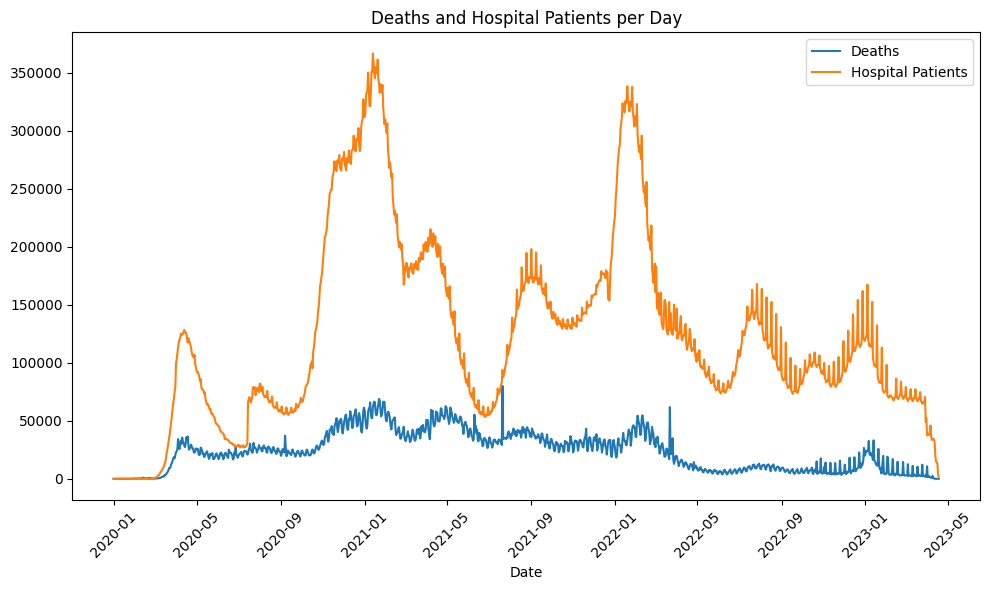

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(df_7_graph['date'], df_7_graph['new_deaths'], label='Deaths')
plt.plot(df_7_graph['date'], df_7_graph['hosp_patients'], label='Hospital Patients')
plt.title('Deaths and Hospital Patients per Day')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusão

Fazendo uma análise global, existe uma relação que 4.61% das pessoas que foram hospitalizadas acabam morrendo, dessa forma podemos concluir que o tratamento hospitalar é eficaz.

## 08 - Países com maior índice de rigidez nas medidas restritivas tendem a ter uma taxa de vacinação mais alta?

**Justificativa:** Países que adotaram medidas restritivas mais rigorosas podem ter demonstrado maior comprometimento em lidar com a crise, o que pode ter acarretado em um maior nível de confiança da população e influenciado positivamente no % de vacinação.

In [70]:
split_8 = ['continent', 'location', 'total_vaccinations', 'stringency_index']
df_8 = vaccinations_df[split_8]
df_8 = df_8[df_8['continent'].notna()]
df_8_group = df_8.groupby('location').agg({'stringency_index': 'median', 'total_vaccinations': 'last'})
df_8_group.head(5)

,stringency_index,total_vaccinations
location,,
Afghanistan,19.44,16693053.0
Albania,46.30,3070468.0
Algeria,50.00,15267442.0
American Samoa,NaN,NaN
Andorra,41.67,156957.0


In [71]:
split_8_death = ['continent', 'location', 'population']
df_8_death = death_df[split_8_death]
df_8_death = df_8_death[df_8_death['continent'].notna()]
df_8_death_group = df_8_death.groupby('location')['population'].first()
df_8_death_group.head(5)

location
Afghanistan       41128772
Albania            2842318
Algeria           44903228
American Samoa       44295
Andorra              79843
Name: population, dtype: int64

In [72]:
merged_df_8 = pd.merge(df_8_group, df_8_death_group, on='location')
merged_df_8['percent'] = round(((merged_df_8['total_vaccinations'] / merged_df_8['population']) * 100), 2)
merged_df_8.head(5)

,stringency_index,total_vaccinations,population,percent
location,,,,
Afghanistan,19.44,16693053.0,41128772,40.59
Albania,46.30,3070468.0,2842318,108.03
Algeria,50.00,15267442.0,44903228,34.00
American Samoa,NaN,NaN,44295,NaN
Andorra,41.67,156957.0,79843,196.58


In [73]:
print(merged_df_8.sort_values(by='stringency_index', ascending=False).head(10))
print(merged_df_8.sort_values(by='percent', ascending=False).head(10))

             stringency_index  total_vaccinations  population  percent
location                                                              
Venezuela               80.56        3.786099e+07    28301700   133.78
Honduras                76.94        1.726892e+07    10432858   165.52
China                   73.61        3.491077e+09  1425887360   244.84
Argentina               71.76        1.153423e+08    45510324   253.44
Jamaica                 71.30        1.522173e+06     2827382    53.84
Myanmar                 70.37        6.454999e+07    54179312   119.14
Philippines             67.13        1.706902e+08   115559008   147.71
Palestine               66.20        3.748571e+06     5250076    71.40
Kazakhstan              65.74        2.091868e+07    19397998   107.84
Canada                  65.08        9.695650e+07    38454328   252.13
           stringency_index  total_vaccinations  population  percent
location                                                            
Gibraltar 

### Conclusão
É difícil afirmar que há uma relação entre os países que adotaram medidas restritivas mais rigorosas (média) e o percentual de vacinados. Os países que mais vacinaram não são os países mais rigorosos em medidas restritivas.

Obs.: Importante observar que pode haver algum problema com o dado de percentual, uma vez que vários países está com percentual de vacinados muito superior a população.


## 09 - Qual é a proporção de pessoas vacinadas que foram hospitalizadas devido à COVID-19 em comparação com pessoas não vacinadas?

**Justificativa:** Verificar a eficácia da vacina.

In [74]:
split_9_d = ['continent', 'location', 'population', 'hosp_patients']
df_9_d = death_df[split_9_d]
df_9_d = df_9_d[df_9_d['continent'].notna()]
df_9_d_group = df_9_d.groupby('location').agg({'population': 'first', 'hosp_patients': 'sum'})
df_9_d_group.head(5)

,population,hosp_patients
location,,
Afghanistan,41128772,0.0
Albania,2842318,0.0
Algeria,44903228,0.0
American Samoa,44295,0.0
Andorra,79843,0.0


In [75]:
split_9_v = ['continent', 'location', 'people_vaccinated']
df_9_v = vaccinations_df[split_9_v]
df_9_v = df_9_v[df_9_v['continent'].notna()]
df_9_v_group = df_9_v.groupby('location')['people_vaccinated'].max()
df_9_v_group.head(5)

location
Afghanistan       14613185.0
Albania            1347054.0
Algeria            7840131.0
American Samoa           NaN
Andorra              57904.0
Name: people_vaccinated, dtype: float64

In [76]:
merged_df_9 = pd.merge(df_9_d_group, df_9_v_group, on='location')
merged_df_9['ñ_vaccinated'] = (merged_df_9['population'] - merged_df_9['people_vaccinated'])
merged_df_9 = merged_df_9[merged_df_9['hosp_patients'] != 0]
merged_df_9.head(5)

,population,hosp_patients,people_vaccinated,ñ_vaccinated
location,,,,
Australia,26177410,1466044.0,22236698.0,3940712.0
Austria,8939617,1407011.0,6899073.0,2040544.0
Belgium,11655923,2022577.0,9266250.0,2389673.0
Bolivia,12224114,368769.0,7361008.0,4863106.0
Bulgaria,6781955,400506.0,2107140.0,4674815.0


In [77]:
merged_df_9 = merged_df_9.agg({'population': 'sum', 'hosp_patients': 'sum', 'people_vaccinated': 'sum', 'ñ_vaccinated': 'sum'})
merged_df_9

population           1.193872e+09
hosp_patients        1.496503e+08
people_vaccinated    9.217641e+08
ñ_vaccinated         2.721082e+08
dtype: float64

In [78]:
merged_df_9['%_v'] = merged_df_9['people_vaccinated'] / merged_df_9['population'] * 100
merged_df_9['%_ñ_v'] = merged_df_9['ñ_vaccinated'] / merged_df_9['population'] * 100

In [79]:
print(f"Percentual de pessoas não vacinadas no hospital: {round((merged_df_9['%_v']), 2)}%")
print(f"Percentual de pessoas vacinadas no hospital: {round((merged_df_9['%_ñ_v']), 2)}%")

Percentual de pessoas não vacinadas no hospital: 77.21%
Percentual de pessoas vacinadas no hospital: 22.79%


### Conclusão

As informações do dataset não são suficientes para responder a pergunta. Tentando chegar em um número a partir do percentual de pessoas vacinadas e não vacinadas podemos inferir que essa proporção se mantem para as pessoas que foram para o hospital.

Obs.: Vários países não possuiam a informação de hosp_patients, e esses foram retirados da análise.

## 11 - Qual a relação entre a quantidade de pacientes hospitalizados e quantos desses foram para a UTI?

**Justificativa:** Para ter uma análise quantitativa dos pacientes que evoluíram para um estado mais grave

In [80]:
split_11_d = ['continent', 'location', 'hosp_patients', 'icu_patients']
df_11_d = death_df[split_11_d]
df_11_d = df_11_d[df_11_d['continent'].notna()]
df_11_d = df_11_d.agg({'hosp_patients': 'sum', 'icu_patients': 'sum'})
df_11_d['%'] =(df_11_d['icu_patients'] / df_11_d['hosp_patients'] * 100)
print(f"O percental de pessoas hospitalizadas que foram para UTI é de: {round(df_11_d['%'], 2)}%")

O percental de pessoas hospitalizadas que foram para UTI é de: 16.79%


### Conclusão

16.79% das pessoas que são hospitalizadas acabam indo para a TI.

## 12 - Como as taxas de vacinação e mortalidade variam entre os diferentes continentes?

**Justificativa:** Relacionar o número de mortos com o número de vacinados e gerar insights sobre a eficácia das campanhas de vacinação e seu impacto na redução de óbitos.

In [81]:
split_12_d = ['location', 'population', 'new_deaths']
df_12_d = death_df[split_12_d]

continents = {
    'Africa': 'Africa',
    'Asia': 'Asia',
    'Europe': 'Europe',
    'South America': 'South America',
    'North America': 'North America',
    'Oceania': 'Oceania'
}
df_12_d['continent'] = df_12_d['location'].map(continents)

df_12_d_continent = df_12_d.groupby('continent').agg({'population': 'first', 'new_deaths': 'sum'})
df_12_d_continent

/tmp/ipykernel_7765/797829831.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12_d['continent'] = df_12_d['location'].map(continents)


,population,new_deaths
continent,,
Africa,1426736614,258851.0
Asia,4721383370,1628635.0
Europe,744807803,2038597.0
North America,600323657,1594720.0
Oceania,45038860,25935.0
South America,436816679,1352944.0


In [82]:
split_12_v = ['location', 'people_vaccinated']
df_12_v = vaccinations_df[split_12_v]
df_12_v['continent'] = df_12_v['location'].map(continents)

df_12_v_continent = df_12_v.groupby('continent').agg({'people_vaccinated': 'last'})
df_12_v_continent

/tmp/ipykernel_7765/2027879716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12_v['continent'] = df_12_v['location'].map(continents)


,people_vaccinated
continent,
Africa,5.207190e+08
Asia,3.667528e+09
Europe,5.230952e+08
North America,4.580809e+08
Oceania,2.896257e+07
South America,3.752737e+08


In [83]:
merged_df_12 = pd.merge(df_12_d_continent, df_12_v_continent, on='continent')
merged_df_12['d_percent'] = round(((merged_df_12['new_deaths'] / merged_df_12['population']) * 100), 2)
merged_df_12['v_percent'] = round(((merged_df_12['people_vaccinated'] / merged_df_12['population']) * 100), 2)

result = merged_df_12.sort_values(by='v_percent', ascending=False)
result

,population,new_deaths,people_vaccinated,d_percent,v_percent
continent,,,,,
South America,436816679,1352944.0,3.752737e+08,0.31,85.91
Asia,4721383370,1628635.0,3.667528e+09,0.03,77.68
North America,600323657,1594720.0,4.580809e+08,0.27,76.31
Europe,744807803,2038597.0,5.230952e+08,0.27,70.23
Oceania,45038860,25935.0,2.896257e+07,0.06,64.31
Africa,1426736614,258851.0,5.207190e+08,0.02,36.50


### Conclusão

A relação entre números de mortos com o número de vacinados não gera nenhuma conclusão no sentido de quanto mais vacinar menor será o número de mortos, uma vez que na South America foi o maior percentual da população vacinada porem também foi o maior percentual de mortes entre os continentes.

## 13 - Os países com as maiores porcentagens de idosos tiveram as maiores taxas de mortalidade por COVID-19?

**Justificativa:** Por os idosos fazerem parte da população de risco, pressupõe-se que os países com as maiores porcentagens desse público, tiveram, consequentemente, as maiores taxas de mortalidade.

In [84]:
split_13_d = ['continent', 'location', 'population', 'total_deaths']
df_13_d = death_df[split_13_d]
df_13_d = df_13_d[df_13_d['continent'].notna()]
df_13_d_group = df_13_d.groupby('location').agg({'population': 'max', 'total_deaths': 'max'})
df_13_d_group['d_percent'] = round(((df_13_d_group['total_deaths'] / df_13_d_group['population']) * 100), 2)
df_13_d_group.head(5)

,population,total_deaths,d_percent
location,,,
Afghanistan,41128772,7884.0,0.02
Albania,2842318,3604.0,0.13
Algeria,44903228,6881.0,0.02
American Samoa,44295,34.0,0.08
Andorra,79843,159.0,0.20


In [85]:
# Considerando que idoso é > 65
split_13_v = ['continent', 'location', 'aged_65_older']
df_13_v = vaccinations_df[split_13_v]
df_13_v = df_13_v[df_13_v['continent'].notna()]
df_13_v_group = df_13_v.groupby('location').agg({'aged_65_older': 'max'})
df_13_v_group.head(5)

,aged_65_older
location,
Afghanistan,2.58
Albania,13.19
Algeria,6.21
American Samoa,NaN
Andorra,NaN


In [86]:
merged_df_13 = pd.merge(df_13_d_group, df_13_v_group, on='location')
result = merged_df_13.sort_values(by='aged_65_older', ascending=False)
result.head(5)

,population,total_deaths,d_percent,aged_65_older
location,,,,
Japan,123951696,74096.0,0.06,27.05
Italy,59037472,189262.0,0.32,23.02
Portugal,10270857,26480.0,0.26,21.50
Germany,83369840,171411.0,0.21,21.45
Finland,5540745,9097.0,0.16,21.23


In [87]:
result_d = merged_df_13.sort_values(by='d_percent', ascending=False)
result_d.head(5)

,population,total_deaths,d_percent,aged_65_older
location,,,,
Peru,34049588,219866.0,0.65,7.15
Bulgaria,6781955,38282.0,0.56,20.80
Bosnia and Herzegovina,3233530,16328.0,0.50,16.57
Hungary,9967304,48719.0,0.49,18.58
North Macedonia,2093606,9667.0,0.46,13.26


### Conclusão

Considerando o TOP-5 não conseguimos afirmar que os países que tem maior percentual de idosos tiveram mais mortes, o que se apresentou na verdade foi que esses países apresentaram baixas taxas de mortes de maneira geral.

## 14 - Os paises com maior populacao por area quadrada tiveram maior numero de incidencias, internações  ou mortes?

**Justificativa:** Paises com maior populacao por area quadrada tiveram um maior numero de incidencias, internações (geral e UTI) ou mortes.

In [88]:
split_14_d = ['continent', 'location', 'population', 'total_cases', 'total_deaths', 'hosp_patients']
df_14_d = death_df[split_14_d]
df_14_d = df_14_d[df_14_d['continent'].notna()]
df_14_d_group = df_14_d.groupby('location').agg({'population': 'max','total_cases': 'max', 'hosp_patients': 'sum', 'total_deaths': 'max'})

df_14_d_group['tc_percent'] = round(((df_14_d_group['total_cases'] / df_14_d_group['population']) * 100), 2)
df_14_d_group['hp_percent'] = round(((df_14_d_group['hosp_patients'] / df_14_d_group['population']) * 100), 2)
df_14_d_group['td_percent'] = round(((df_14_d_group['total_deaths'] / df_14_d_group['population']) * 100), 2)

df_14_d_group.head(5)

,population,total_cases,hosp_patients,total_deaths,tc_percent,hp_percent,td_percent
location,,,,,,,
Afghanistan,41128772,211630.0,0.0,7884.0,0.51,0.0,0.02
Albania,2842318,333897.0,0.0,3604.0,11.75,0.0,0.13
Algeria,44903228,271613.0,0.0,6881.0,0.60,0.0,0.02
American Samoa,44295,8326.0,0.0,34.0,18.80,0.0,0.08
Andorra,79843,47939.0,0.0,159.0,60.04,0.0,0.20


In [89]:
split_14_v = ['continent', 'location', 'population_density']
df_14_v = vaccinations_df[split_14_v]
df_14_v = df_14_v[df_14_v['continent'].notna()]
df_14_v_group = df_14_v.groupby('location').agg({'population_density': 'max'})
df_14_v_group.head(5)

,population_density
location,
Afghanistan,54.42
Albania,104.87
Algeria,17.35
American Samoa,278.21
Andorra,163.76


In [90]:
merged_df_14 = pd.merge(df_14_d_group, df_14_v_group, on='location')
merged_df_14 = merged_df_14[merged_df_14['hosp_patients'] != 0]
result = merged_df_14.sort_values(by='population_density', ascending=False)
result.head(5)

,population,total_cases,hosp_patients,total_deaths,tc_percent,hp_percent,td_percent,population_density
location,,,,,,,,
South Korea,51815808,30918060.0,470347.0,34332.0,59.67,0.91,0.07,527.97
Netherlands,17564020,8610372.0,551206.0,22992.0,49.02,3.14,0.13,508.54
Israel,9449000,4817255.0,958583.0,12416.0,50.98,10.14,0.13,402.61
Belgium,11655923,4782863.0,2022577.0,34115.0,41.03,17.35,0.29,375.56
Japan,123951696,33523927.0,1865274.0,74096.0,27.05,1.50,0.06,347.78


In [91]:
print(f"total_cases:\n -> Máximo: {result['tc_percent'].max()}%\n -> Média: {result['tc_percent'].median()}%\n")
print(f"hosp_patients:\n -> Máximo: {result['hp_percent'].max()}%\n -> Média: {result['hp_percent'].median()}%\n")
print(f"total_deaths:\n -> Máximo: {result['td_percent'].max()}%\n -> Média: {result['td_percent'].median()}%\n")

total_cases:
 -> Máximo: 73.18%
 -> Média: 36.74%

hosp_patients:
 -> Máximo: 35.84%
 -> Média: 13.32%

total_deaths:
 -> Máximo: 0.56%
 -> Média: 0.23%



### Conclusão

De maneira geral, analisando os TOP-5 em termos de densidade populacional temos que o total de mortes e de pacientes hospitalizados estão inferiores a média dos valores registrados. Já analisando os números de total de casos de Covid esses valores estão acima da média, podendo ter sim uma relação entre maior contaminação em locais com maior densidade populacional.

## 15 - A quantidade de pessoas hospitalizadas diminuiu quando o total de vacinação aumentou?

**Justificativa:** Como o covid foi responsável por lotar os hospitais pelo mundo todo, espera-se que conforme a vacinação progrediu, o número de pessoas hospilatizados tenha diminuido.

In [92]:
split_15_d = ['continent', 'location', 'date', 'hosp_patients']
df_15_d = death_df[split_15_d]
df_15_d = df_15_d[df_15_d['continent'].notna()]
df_15_d['date'] = pd.to_datetime(df_15_d['date'])
df_15_d_group = df_15_d.groupby('date').agg({'hosp_patients': 'sum'})

df_15_d_group.head(5)

,hosp_patients
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [93]:
split_15_v = ['continent', 'location', 'date', 'total_vaccinations']
df_15_v = vaccinations_df[split_15_v]
df_15_v = df_15_v[df_15_v['continent'].notna()]
df_15_v['date'] = pd.to_datetime(df_15_v['date'])
df_15_v_group = df_15_v.groupby('date').agg({'total_vaccinations': 'sum'})

df_15_v_group.head(5)

,total_vaccinations
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [94]:
merged_df_15 = pd.merge(df_15_d_group, df_15_v_group, on='date').reset_index()
merged_df_15

,date,hosp_patients,total_vaccinations
0,2020-01-01,0.0,0.000000e+00
1,2020-01-02,0.0,0.000000e+00
2,2020-01-03,0.0,0.000000e+00
3,2020-01-04,0.0,0.000000e+00
4,2020-01-05,0.0,0.000000e+00
...,...,...,...
1199,2023-04-14,14892.0,3.236053e+09
1200,2023-04-15,14228.0,3.275308e+09
1201,2023-04-16,13837.0,3.244981e+09
1202,2023-04-17,2821.0,2.932550e+09


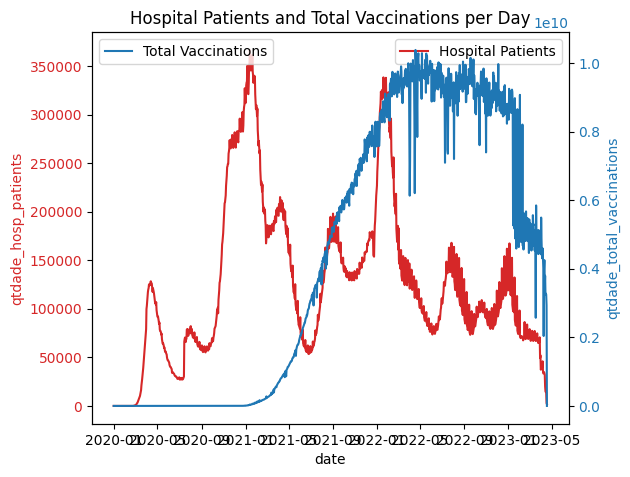

In [97]:
# Plotar gráfico

fig, ax1 = plt.subplots()

ax1.set_xlabel('date')
ax1.set_ylabel('qtdade_hosp_patients', color='tab:red')
ax1.plot(merged_df_15['date'], merged_df_15['hosp_patients'], label='Hospital Patients', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend()

ax2 = ax1.twinx()

ax2.set_ylabel('qtdade_total_vaccinations', color='tab:blue')
ax2.plot(merged_df_15['date'], merged_df_15['total_vaccinations'], label='Total Vaccinations', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend()

fig.tight_layout()

plt.title('Hospital Patients and Total Vaccinations per Day')
plt.show()

### Conclusão

Analisando o gráfico faz sentido afirmar que a medida que o número de vacinação aumentou o número de hospitalizados reduziu. Há entretanto uma variação no meio do gráfico que pode ser alguma coisa referênte a novas cepas ou ao tempo necessário para a vacina se tornar eficaz.

## 16 - Países com os maiores PIBs foram os que tiveram as menores taxas de mortalidade?

**Justificativa:** Verificar se as medidas necessárias para a proteção da sociedade são necessariamente mais caras ou se medidas mais baratas mas executadas de forma correta são tão efetivas quanto.

In [98]:
split_16_d = ['continent', 'location', 'population', 'total_deaths']
df_16_d = death_df[split_16_d]
df_16_d = df_16_d[df_16_d['continent'].notna()]
df_16_d_group = df_16_d.groupby('location').agg({'population': 'max', 'total_deaths': 'max'})
df_16_d_group['death_percent'] = round(((df_16_d_group['total_deaths'] / df_16_d_group['population']) * 100), 2)
df_16_d_group.head(5)

,population,total_deaths,death_percent
location,,,
Afghanistan,41128772,7884.0,0.02
Albania,2842318,3604.0,0.13
Algeria,44903228,6881.0,0.02
American Samoa,44295,34.0,0.08
Andorra,79843,159.0,0.20


In [99]:
split_16_v = ['continent', 'location', 'gdp_per_capita']
df_16_v = vaccinations_df[split_16_v]
df_16_v = df_16_v[df_16_v['continent'].notna()]
df_16_v_group = df_16_v.groupby('location').agg({'gdp_per_capita': 'max'})
df_16_v_group.head(5)

,gdp_per_capita
location,
Afghanistan,1803.99
Albania,11803.43
Algeria,13913.84
American Samoa,NaN
Andorra,NaN


In [100]:
merged_df_16 = pd.merge(df_16_d_group, df_16_v_group, on='location')
merged_df_16

,population,total_deaths,death_percent,gdp_per_capita
location,,,,
Afghanistan,41128772,7884.0,0.02,1803.99
Albania,2842318,3604.0,0.13,11803.43
Algeria,44903228,6881.0,0.02,13913.84
American Samoa,44295,34.0,0.08,NaN
Andorra,79843,159.0,0.20,NaN
...,...,...,...,...
Wallis and Futuna,11596,7.0,0.06,NaN
Western Sahara,576005,NaN,NaN,NaN
Yemen,33696612,2159.0,0.01,1479.15


In [101]:
result_16_gdp = merged_df_16.sort_values(by='gdp_per_capita', ascending=False)
result_16_gdp.head(10)

,population,total_deaths,death_percent,gdp_per_capita
location,,,,
Qatar,2695131,688.0,0.03,116935.60
Macao,695180,NaN,NaN,104861.85
Luxembourg,647601,1232.0,0.19,94277.97
Singapore,5637022,1722.0,0.03,85535.38
Brunei,449002,153.0,0.03,71809.25
Ireland,5023108,8782.0,0.17,67335.29
United Arab Emirates,9441138,2349.0,0.02,67293.48
Kuwait,4268886,2570.0,0.06,65530.54
Norway,5434324,5311.0,0.10,64800.06


In [102]:
result_16_d = merged_df_16.sort_values(by='death_percent', ascending=True)
result_16_d.head(10)

,population,total_deaths,death_percent,gdp_per_capita
location,,,,
Democratic Republic of Congo,99010216,1464.0,0.0,808.13
Nigeria,218541216,3155.0,0.0,5338.45
Niger,26207982,315.0,0.0,926.00
Nicaragua,6948395,245.0,0.0,5321.44
Central African Republic,5579148,113.0,0.0,661.24
Chad,17723312,194.0,0.0,1768.15
Bhutan,782457,21.0,0.0,8708.60
Sierra Leone,8605723,126.0,0.0,1390.30
Benin,13352864,163.0,0.0,2064.24


### Conclusão

A partir desse dataset não é possível afirmar que os países com os maiores PIBs foram os que tiveram menores taxas de mortalidade. Verificando o TOP-10 de cada modalidade nenhum dos países são representados nas duas tabelas.

## 17 - Em qual data ocorreram mais mortes por covid mundialmente?

**Justificativa:** Verificar o dia em que aconteceram mais mortes no mundo (soma de mortes por países).

In [103]:
split_17_d = ['location', 'date', 'new_deaths']
df_17_d = death_df[split_17_d]
df_17_d = df_17_d[df_17_d['location'] == 'World']
df_17_d['date'] = pd.to_datetime(df_17_d['date'])

max_td = df_17_d['new_deaths'].max()
result_17 = df_17_d[df_17_d['new_deaths'] == max_td]
result_17

,location,date,new_deaths
298525,World,2021-07-21,20005.0


### Conclusão

O dia que ocorreu mais mortes no mundo foi: 21/07/2021 onde resgistrou 20.005 mortes.

## 18 - Top 10 maiores valores na relação de quantidade de testes realizados e mortes ocorridas por país.

**Justificativa:** Comparar a quantidade de mortes com a quantidade de pessoas testadas por milhão de pessoas por país, considerando que uma vez testada a pessoa deveria se isolar, assim diminuir a manifestação da doença e consequentemente a ocorrência de mortes.

In [104]:
split_18_d = ['continent', 'location', 'total_deaths']
df_18_d = death_df[split_18_d]
df_18_d = df_18_d[df_18_d['continent'].notna()]
df_18_d_group = df_18_d.groupby('location').agg({'total_deaths': 'max'})
df_18_d_group.head(5)

,total_deaths
location,
Afghanistan,7884.0
Albania,3604.0
Algeria,6881.0
American Samoa,34.0
Andorra,159.0


In [105]:
split_18_v = ['continent', 'location', 'total_tests_per_thousand']
df_18_v = vaccinations_df[split_18_v]
df_18_v = df_18_v[df_18_v['continent'].notna()]
df_18_v_group = df_18_v.groupby('location').agg({'total_tests_per_thousand': 'max'})
df_18_v_group.head(5)

,total_tests_per_thousand
location,
Afghanistan,24.81
Albania,565.34
Algeria,5.22
American Samoa,NaN
Andorra,3799.72


In [106]:
merged_df_18 = pd.merge(df_18_d_group, df_18_v_group, on='location')
merged_df_18['percent'] = round(((merged_df_18['total_deaths'] / (merged_df_18['total_tests_per_thousand']*1000)) * 100), 2)
merged_df_18 = merged_df_18.sort_values(by='total_tests_per_thousand', ascending=False)
merged_df_18.head(10)

,total_deaths,total_tests_per_thousand,percent
location,,,
Cyprus,1349.0,32925.83,0.00
Austria,22183.0,21272.13,0.10
United Arab Emirates,2349.0,17994.67,0.01
Gibraltar,113.0,16322.87,0.00
Faeroe Islands,28.0,14707.40,0.00
Denmark,8420.0,11043.26,0.08
Slovakia,21123.0,9405.66,0.22
Greece,36629.0,8088.12,0.45
United Kingdom,212083.0,7480.12,2.84


In [107]:
print(f"Média do percentual: {merged_df_18['percent'].median()}%")

Média do percentual: 0.98%


### Conclusão

Podemos inferir que quanto maior a quantidade de testes realizados menor e o número de mortes. Pegando os TOP-10 em quantidade de teste, a maioria possui valores bem abaixo da média da relação entre morte por testes, só o país United Kngdom como exceção.


## 19 - Comparar a média de mortes p/ milhão dos paises maior qtd de pessoas com vacinação completa e menor quantidade de pessoas com vacinação completa.

**Justificativa:** Impacto da vacinação completa na média de mortes.

In [108]:
split_19_d = ['continent', 'location', 'total_deaths_per_million']
df_19_d = death_df[split_19_d]
df_19_d = df_19_d[df_19_d['continent'].notna()]
df_19_d_group = df_19_d.groupby('location').agg({'total_deaths_per_million': 'max'})

In [109]:
split_19_v = ['continent', 'location', 'people_fully_vaccinated']
df_19_v = vaccinations_df[split_19_v]
df_19_v = df_19_v[df_19_v['continent'].notna()]
df_19_v_group = df_19_v.groupby('location').agg({'people_fully_vaccinated': 'max'})

In [110]:
merged_df_19 = pd.merge(df_19_d_group, df_19_v_group, on='location')
merged_df_19 = merged_df_19[merged_df_19['total_deaths_per_million'].notna()]
top_5_sup = merged_df_19.sort_values(by='people_fully_vaccinated', ascending=False).head(5)
top_5_sup

,total_deaths_per_million,people_fully_vaccinated
location,,
China,84.793,1.276760e+09
India,374.690,9.519652e+08
United States,3307.223,2.304676e+08
Brazil,3253.656,1.761642e+08
Indonesia,584.647,1.726933e+08


In [111]:
top_5_inf = merged_df_19.sort_values(by='people_fully_vaccinated', ascending=True).head(5)
top_5_inf

,total_deaths_per_million,people_fully_vaccinated
location,,
Montserrat,1812.826,1952.0
Wallis and Futuna,603.656,6803.0
Anguilla,755.810,10380.0
Nauru,78.796,11346.0
Cook Islands,117.426,14728.0


In [112]:
print(f"Média de mortes/milhão do TOP-5 países com \033[1mMAIOR\033[0m número de vacinação completa: {top_5_sup['total_deaths_per_million'].median()} ")
print(f"Média de mortes/milhão do TOP-5 países com \033[1mMENOR\033[0m número de vacinação completa: {top_5_inf['total_deaths_per_million'].median()} ")

Média de mortes/milhão do TOP-5 países com MAIOR número de vacinação completa: 584.647 
Média de mortes/milhão do TOP-5 países com MENOR número de vacinação completa: 603.656 


### Conclusão

A partir dos dados temos uma diferença de apenas 19 mortes/milhão entre os TOP-5 maior quantidade de vacinados completos e TOP-5 menor quantidade de vacinados.

Para conseguir verificar, de fato, o impacto da vacinação, talvez a melhor análise fosse considerando % em relação a população do país tanto para o número de mortes quanto para vacinação completa.

## 20 - Qual continente foi mais afetado pelo Covid?

**Justificativa:** Análises de mortes, número de vacinados, taxa de vacinação por continente, qual foi o continente mais afetado.

In [113]:
split_20_d = ['continent', 'location', 'population', 'total_deaths']
df_20_d = death_df[split_20_d]

continents = {
    'Africa': 'Africa',
    'Asia': 'Asia',
    'Europe': 'Europe',
    'South America': 'South America',
    'North America': 'North America',
    'Oceania': 'Oceania'
}
df_20_d['continent'] = df_20_d['location'].map(continents)

df_20_d_continent = df_20_d.groupby('continent').agg({'population': 'max', 'total_deaths': 'max'})
df_20_d_continent['percent'] = round(((df_20_d_continent['total_deaths'] / df_20_d_continent['population']) * 100), 2)
df_20_d_continent.sort_values(by='percent', ascending=False)

/tmp/ipykernel_7765/431462154.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_d['continent'] = df_20_d['location'].map(continents)


,population,total_deaths,percent
continent,,,
South America,436816679,1352942.0,0.31
Europe,744807803,2038559.0,0.27
North America,600323657,1592261.0,0.27
Oceania,45038860,25926.0,0.06
Asia,4721383370,1628478.0,0.03
Africa,1426736614,258841.0,0.02


### Conclusão

Considerando que o principal impacto da Covid é o número de mortes, temos que o continente Sul Americano foi o mais afetado, tendo 0,31% de sua população falecendo, seguido de Europa e América do Norte com 0.27% de sua população morta.

## 21 - Qual a Taxa de sobrevivência UTI covid?

**Justificativa:** -

### Conclusão

Não consegui responder o questionamento com o dataset, só encontrei o número de internações na UTI por dia, mas não tenho a informação de quantidade de mortes por dia dos internados na UTI e não consegui correlacionar as colunas para obter essa informação :(


## 22 - Qual o top10 de países que receberam a primeira dose da vacina? E o top10 de países que receberam até a dose de reforço?

**Justificativa:** Comparação entre o top10 dos países que receberam a primeira e todas as doses, visando saber se são os mesmos.

In [114]:
split_22_d = ['continent', 'location', 'population']
df_22_d = death_df[split_22_d]
df_22_d = df_22_d[df_22_d['continent'].notna()]
df_22_d_group = df_22_d.groupby('location').agg({'population': 'max'})
df_22_d_group.head(5)

,population
location,
Afghanistan,41128772
Albania,2842318
Algeria,44903228
American Samoa,44295
Andorra,79843


In [115]:
split_22_v = ['continent', 'location', 'people_vaccinated', 'people_fully_vaccinated']
df_22_v = vaccinations_df[split_22_v]
df_22_v = df_22_v[df_22_v['continent'].notna()]
df_22_v_group = df_22_v.groupby('location').agg({'people_vaccinated': 'max','people_fully_vaccinated': 'max'})
df_22_v_group.head(5)

,people_vaccinated,people_fully_vaccinated
location,,
Afghanistan,14613185.0,13900701.0
Albania,1347054.0,1276432.0
Algeria,7840131.0,6481186.0
American Samoa,NaN,NaN
Andorra,57904.0,53492.0


In [117]:
merged_df_22 = pd.merge(df_22_d_group, df_22_v_group, on='location')
merged_df_22['percent_v'] = round(((merged_df_22['people_vaccinated'] / merged_df_22['population']) * 100), 2)
merged_df_22['fully_percent'] = round(((merged_df_22['people_fully_vaccinated'] / merged_df_22['population']) * 100), 2)
merged_df_22.head(10)

,population,people_vaccinated,people_fully_vaccinated,percent_v,fully_percent
location,,,,,
Afghanistan,41128772,14613185.0,13900701.0,35.53,33.80
Albania,2842318,1347054.0,1276432.0,47.39,44.91
Algeria,44903228,7840131.0,6481186.0,17.46,14.43
American Samoa,44295,NaN,NaN,NaN,NaN
Andorra,79843,57904.0,53492.0,72.52,67.00
Angola,35588996,15590125.0,8684976.0,43.81,24.40
Anguilla,15877,10854.0,10380.0,68.36,65.38
Antigua and Barbuda,93772,64290.0,62384.0,68.56,66.53
Argentina,45510324,41486239.0,34868474.0,91.16,76.62


In [118]:
merged_df_22.sort_values(by='percent_v', ascending=False).head(10)

,population,people_vaccinated,people_fully_vaccinated,percent_v,fully_percent
location,,,,,
Gibraltar,32677,42175.0,41465.0,129.07,126.89
Tokelau,1893,2203.0,2203.0,116.38,116.38
United Arab Emirates,9441138,9991089.0,9792266.0,105.83,103.72
Qatar,2695131,2852032.0,2852032.0,105.82,105.82
Nauru,12691,13106.0,11346.0,103.27,89.40
Brunei,449002,450944.0,446551.0,100.43,99.45
Pitcairn,47,47.0,47.0,100.00,100.00
Macao,695180,679703.0,642266.0,97.77,92.39
Cuba,11212198,10734201.0,10012178.0,95.74,89.30


In [119]:
merged_df_22.sort_values(by='fully_percent', ascending=False).head(10)

,population,people_vaccinated,people_fully_vaccinated,percent_v,fully_percent
location,,,,,
Gibraltar,32677,42175.0,41465.0,129.07,126.89
Tokelau,1893,2203.0,2203.0,116.38,116.38
Qatar,2695131,2852032.0,2852032.0,105.82,105.82
United Arab Emirates,9441138,9991089.0,9792266.0,105.83,103.72
Pitcairn,47,47.0,47.0,100.00,100.00
Brunei,449002,450944.0,446551.0,100.43,99.45
Macao,695180,679703.0,642266.0,97.77,92.39
Singapore,5637022,5160551.0,5120969.0,91.55,90.85
Hong Kong,7488863,6915178.0,6798913.0,92.34,90.79


### Conclusão

Considerando o TOP-10 países que receberam primeira dose da vacina e o TOP-10 dos países que mais vacinou sua população de maneira completa (2ªdose) temos que sete desses países são os mesmo, podemos então concluir que os que mais vacinaram são também os que imunizaram sua população com todas as doses.

## 23 - Qual o top10 países com maior índice de ridigez do pais e qual foi seu nível de infeção por densidade populacional?

**Justificativa:** -

In [120]:
split_23_d = ['continent', 'location', 'population', 'total_cases']
df_23_d = death_df[split_23_d]
df_23_d = df_23_d[df_23_d['continent'].notna()]
df_23_d_group = df_23_d.groupby('location').agg({'population': 'max', 'total_cases': 'max'})
df_23_d_group['percent'] = round((df_23_d_group['total_cases'] / df_23_d_group['population'] * 100), 2)
df_23_d_group.head(5)

,population,total_cases,percent
location,,,
Afghanistan,41128772,211630.0,0.51
Albania,2842318,333897.0,11.75
Algeria,44903228,271613.0,0.60
American Samoa,44295,8326.0,18.80
Andorra,79843,47939.0,60.04


In [121]:
split_23_v = ['continent', 'location', 'stringency_index']
df_23_v = vaccinations_df[split_23_v]
df_23_v = df_23_v[df_23_v['continent'].notna()]
df_23_v_group = df_23_v.groupby('location').agg({'stringency_index': 'median'})
df_23_v_group.sample(5)

,stringency_index
location,
Aruba,34.26
Bhutan,62.96
Sudan,16.67
Falkland Islands,NaN
Palau,NaN


In [122]:
merged_df_23 = pd.merge(df_23_d_group, df_23_v_group, on='location')
merged_df_23.sort_values(by='stringency_index', ascending=False).head(10)

,population,total_cases,percent,stringency_index
location,,,,
Venezuela,28301700,552398.0,1.95,80.56
Honduras,10432858,472467.0,4.53,76.94
China,1425887360,99239252.0,6.96,73.61
Argentina,45510324,10044957.0,22.07,71.76
Jamaica,2827382,154602.0,5.47,71.30
Myanmar,54179312,634105.0,1.17,70.37
Philippines,115559008,4083678.0,3.53,67.13
Palestine,5250076,703228.0,13.39,66.20
Kazakhstan,19397998,1501450.0,7.74,65.74


In [123]:
merged_df_23['percent'].median()

13.605

### Conclusão

De fato o nível de rigidez do país contribuiu para que uma menor parcela da população fosse infectada. Observando o TOP-10 países mais rígidos apenas um, a Argentina, teve um percentual de infecção mais alto que a média, portanto é possível fazer uma relação entre rigidez e contaminação da população.

## 24 - Países com maior densidade populacional foram mais restritos na rígidez?

**Justificativa:** -

In [124]:
split_24_v = ['continent', 'location', 'stringency_index', 'population_density']
df_24_v = vaccinations_df[split_24_v]
df_24_v = df_24_v[df_24_v['continent'].notna()]
df_24_v_group = df_24_v.groupby('location').agg({'stringency_index': 'median', 'population_density': 'max'})
df_24_v_group.sort_values(by='population_density', ascending=False).head(10)

,stringency_index,population_density
location,,
Macao,32.41,20546.77
Monaco,34.95,19347.50
Singapore,46.66,7915.73
Hong Kong,59.26,7039.71
Gibraltar,NaN,3457.10
Bahrain,37.43,1935.91
Maldives,NaN,1454.43
Malta,43.52,1454.04
Bermuda,39.84,1308.82


In [125]:
df_24_v_group['stringency_index'].median()

44.44

### Conclusão

Considerando os TOP-10 países com maior densidade populacional, não podemos afirmar que eles foram os mais rigidos pois desses dez, apenas três registraram valores de rigidez acima do valor médio, e mesmo assim bem próximos a média.

## 25 - Qual foi a quantidade de mortes por milhão de habitantes nos países sulamericanos?

**Justificativa:** Provavelmente, ao comprar a quantidade de mortes por milhão de habitantes ajudará a ter um indicativo de quais políticas públicas seriam mais eficazes.

In [126]:
split_25_d = ['continent', 'location', 'total_deaths_per_million']
df_25_d = death_df[split_25_d]
df_24_v = df_24_v[df_24_v['continent'].notna()]
df_25_d_group = df_25_d.groupby('location').agg({'continent': 'first', 'total_deaths_per_million': 'max'})
result = df_25_d_group[df_25_d_group['continent'] == 'South America']
result.sort_values(by='total_deaths_per_million', ascending=False)

,continent,total_deaths_per_million
location,,
Peru,South America,6457.229
Chile,South America,3290.036
Brazil,South America,3253.656
Paraguay,South America,2931.831
Argentina,South America,2866.866
Colombia,South America,2750.702
Suriname,South America,2271.676
Uruguay,South America,2226.542
Ecuador,South America,2000.833


### Conclusão

Foi possível gerar a tabela como total de mortes por milhão de habitantes de cada país da América do Sul.